## 1_Cleaning the data and exploring
### Import librairies and data

In [416]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot  as plt
import numpy as np
import feather
import seaborn as sns
from datetime import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 500
pd.options.display.max_columns = 200 
pd.set_option('display.float_format', lambda x: '%.3f' % x) #display numbers as decimals instead of scientific value

plt.rcParams["font.size"] = (18)

In [417]:
fast =False
if fast :
    file_path = '2016_clean.csv'
    df = pd.read_csv(file_path, low_memory=False)

In [418]:
if (fast)==False :
    df =pd.DataFrame()
    file_path = 'sources/2016_xx.csv'
    for i in range(1,13):
        if i ==4:
            skiprows=[121011, 386248,388290, 389370, 389547, 453857, 461815]
        else:
            skiprows= []
        file_path_i = file_path.replace('xx', str(i).zfill(2) )
        print( 'importing', file_path_i)
        df = df.append(pd.read_csv(file_path_i, low_memory=False, skiprows=skiprows))
        print ('CSV Imported. Shape :')
        df.shape 

df_save = df.copy() #keep a copy of original data


importing sources/2016_01.csv
CSV Imported. Shape :


(445827, 65)

importing sources/2016_02.csv
CSV Imported. Shape :


(869716, 65)

importing sources/2016_03.csv
CSV Imported. Shape :


(1348838, 65)

importing sources/2016_04.csv
CSV Imported. Shape :


(1828787, 65)

importing sources/2016_05.csv
CSV Imported. Shape :


(2308145, 65)

importing sources/2016_06.csv
CSV Imported. Shape :


(2795782, 65)

importing sources/2016_07.csv
CSV Imported. Shape :


(3298239, 65)

importing sources/2016_08.csv
CSV Imported. Shape :


(3796586, 65)

importing sources/2016_09.csv
CSV Imported. Shape :


(4251464, 65)

importing sources/2016_10.csv
CSV Imported. Shape :


(4724090, 65)

importing sources/2016_11.csv
CSV Imported. Shape :


(5175028, 65)

importing sources/2016_12.csv
CSV Imported. Shape :


(5635977, 65)

In [419]:
df = df_save.copy() 

### Dropping some unused features

In [420]:
print(len(df['ORIGIN_STATE_ABR'].append(df['DEST_STATE_ABR']).unique()) , 'unique states')

55 unique states


In [421]:
columns_to_drop = ['Unnamed: 0', 'YEAR','MONTH', 'DAY_OF_MONTH', 'QUARTER', 'UNIQUE_CARRIER'
                   ,'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_NAME', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_STATE_ABR'
                   ,'ORIGIN_STATE_NM'
                   ,'DEST_AIRPORT_SEQ_ID',  'DEST_CITY_NAME', 'DEST_CITY_MARKET_ID' ,'DEST'
                   ,'DEST_STATE_ABR', 'DEST_STATE_NM'
                   ,'DEP_TIME_BLK', 'DEP_DELAY_GROUP', 'DEP_DELAY', 'DEP_DEL15'
                   ,'CANCELLATION_CODE'
                   ,'CANCELLED', 'DIVERTED'
                   ,'ARR_DEL15'
                   ,'ACTUAL_ELAPSED_TIME'
                   ,'DISTANCE_GROUP'
                   ,'FL_NUM'
                   ,'TAXI_OUT','WHEELS_OFF','WHEELS_ON','TAXI_IN','AIR_TIME' 
                   ,'ARR_DEL15','ARR_DELAY_GROUP','ARR_TIME_BLK','FIRST_DEP_TIME','LONGEST_ADD_GTIME', 'TOTAL_ADD_GTIME'
                   ,'DISTANCE'
                   ,'DEST_STATE_FIPS', 'ORIGIN_STATE_FIPS', 'DEST_WAC' ,'ORIGIN_WAC'
                   ,'AIRLINE_ID'
                   ,'DEP_TIME', 'ARR_TIME', 'FLIGHTS'
                   ,'Unnamed: 64']
df= df.drop(columns_to_drop, axis = 1, errors = 'ignore')

In [422]:
#Transform FL_DATE string into date
df.rename({'FL_DATE': 'DATE'}, axis='columns', inplace = True)
df['DATE'] = df['DATE'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))

In [423]:
df.shape
df.columns

(5635977, 17)

Index(['DAY_OF_WEEK', 'DATE', 'CARRIER', 'TAIL_NUM', 'ORIGIN_AIRPORT_ID',
       'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'DEP_DELAY_NEW', 'CRS_ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'CRS_ELAPSED_TIME', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [424]:
df.head(10)

,DAY_OF_WEEK,DATE,CARRIER,TAIL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CRS_ELAPSED_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,3,2016-01-06,AA,N4YBAA,11298.000,11433.000,1100.000,0.000,1438.000,-6.000,0.000,158.000,nan,nan,nan,nan,nan
1,4,2016-01-07,AA,N434AA,11298.000,11433.000,1100.000,0.000,1438.000,-12.000,0.000,158.000,nan,nan,nan,nan,nan
2,5,2016-01-08,AA,N541AA,11298.000,11433.000,1100.000,0.000,1438.000,7.000,7.000,158.000,nan,nan,nan,nan,nan
3,6,2016-01-09,AA,N489AA,11298.000,11433.000,1100.000,2.000,1438.000,-5.000,0.000,158.000,nan,nan,nan,nan,nan
4,7,2016-01-10,AA,N439AA,11298.000,11433.000,1100.000,100.000,1438.000,113.000,113.000,158.000,0.000,0.000,47.000,0.000,66.000
5,1,2016-01-11,AA,N468AA,11298.000,11433.000,1100.000,7.000,1438.000,-3.000,0.000,158.000,nan,nan,nan,nan,nan
6,2,2016-01-12,AA,N4YBAA,11298.000,11433.000,1100.000,0.000,1438.000,0.000,0.000,158.000,nan,nan,nan,nan,nan
7,3,2016-01-13,AA,N569AA,11298.000,11433.000,1100.000,0.000,1438.000,-7.000,0.000,158.000,nan,nan,nan,nan,nan
8,4,2016-01-14,AA,N466AA,11298.000,11433.000,1100.000,0.000,1438.000,-10.000,0.000,158.000,nan,nan,nan,nan,nan
9,5,2016-01-15,AA,N501AA,11298.000,11433.000,1100.000,0.000,1438.000,-4.000,0.000,158.000,nan,nan,nan,nan,nan


In [425]:
df.describe(include='all')

,DAY_OF_WEEK,DATE,CARRIER,TAIL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CRS_ELAPSED_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,5635977.000,5635977,5635977,5623227,5635977.000,5635977.000,5635977.000,5572438.000,5635974.000,5556196.000,5556196.000,5635967.000,968440.000,968440.000,968440.000,968440.000,968440.000
unique,nan,366,12,5035,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,2016-03-25 00:00:00,WN,N491HA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,21367,1296854,3937,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
first,nan,2016-01-01 00:00:00,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
last,nan,2016-12-31 00:00:00,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,3.930,NaN,NaN,NaN,12676.166,12675.841,1331.097,11.906,1491.054,3.536,11.868,145.214,20.301,2.710,14.698,0.085,24.339
std,1.985,NaN,NaN,NaN,1535.728,1535.409,489.451,38.779,516.014,41.922,38.413,76.301,57.451,21.434,30.568,2.426,45.942
min,1.000,NaN,NaN,NaN,15.000,-1.000,1.000,0.000,1.000,-152.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
25%,2.000,NaN,NaN,NaN,11292.000,11292.000,915.000,0.000,1105.000,-14.000,0.000,88.000,0.000,0.000,0.000,0.000,0.000


#### Drop some rows

In [426]:
df_na = df.dropna(how  ='any', subset =[ 'DAY_OF_WEEK', 'DATE',  'CARRIER', 'TAIL_NUM', 
       'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',  
        'CRS_DEP_TIME','DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_DELAY_NEW', 'CRS_ELAPSED_TIME'])
print(df.shape[0] - df_na.shape[0] ,'rows with NA values')
df = df_na
df_na=[]

79782 rows with NA values


In [427]:
print(len(df['ORIGIN_AIRPORT_ID'].append(df['DEST_AIRPORT_ID']).unique()), 'unique airports')

311 unique airports


In [428]:
print(df[df['ARR_DELAY']<-5].count().max(), 'flights early by 5 min or more')

2851642 flights early by 5 min or more


### Fill NA values

In [429]:
def count_nan(feature_name):
    print(df[feature_name].isna().sum(),'null/nan values for:',feature_name)
def fill_feature_with_mean(feature_name) :
    count_nan(feature_name)
    print('Filling null',feature_name,'with mean:',round(df[feature_name].mean(),2))
    df[feature_name] = df[feature_name].fillna(round(df[feature_name].mean(),2))
def fill_feature_with_empty(feature_name) :
    count_nan(feature_name)
    if df.dtypes[feature_name] in ['int64','float64']:
        print('Filling null',feature_name,'with zeros')
        df[feature_name] = df[feature_name].fillna(0)
    elif df.dtypes[feature_name] in ['object']:
        print('Filling null',feature_name,'with empty string')
        df[feature_name] = df[feature_name].fillna('')
    else :
        print('error, unmanaged pandas dtype')
def fill_feature_with_value(feature_name, value) :
    count_nan(feature_name)
    print('Filling null',feature_name,'with mean:',value)
    df[feature_name] = df[feature_name].fillna(value)

In [430]:
features_to_fill_with_empty = [
'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'
]

for feature in features_to_fill_with_empty:
    fill_feature_with_empty(feature)

4587755 null/nan values for: CARRIER_DELAY
Filling null CARRIER_DELAY with zeros
4587755 null/nan values for: WEATHER_DELAY
Filling null WEATHER_DELAY with zeros
4587755 null/nan values for: NAS_DELAY
Filling null NAS_DELAY with zeros
4587755 null/nan values for: SECURITY_DELAY
Filling null SECURITY_DELAY with zeros
4587755 null/nan values for: LATE_AIRCRAFT_DELAY
Filling null LATE_AIRCRAFT_DELAY with zeros


In [431]:
df.shape

(5556195, 17)

### Delay column & int64

In [432]:
df['DELAY'] = df['ARR_DELAY_NEW']+0

In [433]:
for column in df.columns:
    if df[column].dtype == 'float64':
        df[column] = df[column].astype('int64',  copy=False)
    

In [434]:
df['DELAY'].describe()

count   5556195.000
mean         11.868
std          38.413
min           0.000
25%           0.000
50%           0.000
75%           6.000
max        2142.000
Name: DELAY, dtype: float64

In [435]:
samples =df

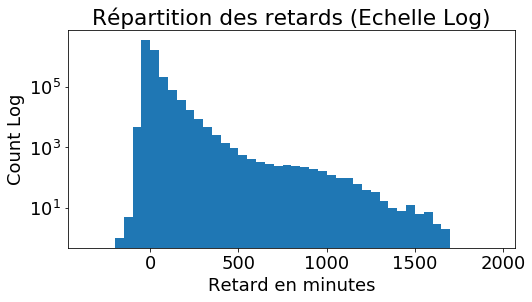

In [436]:

plt.rcParams["figure.figsize"] = (8,4)
fig = plt.hist(df['ARR_DELAY'], bins=range(-350,2000, 50), log=True)
silent = plt.title('Répartition des retards (Echelle Log)')
silent = plt.ylabel('Count Log')
silent = plt.xlabel('Retard en minutes')
        

In [437]:
from scipy.optimize import curve_fit
from scipy.stats import exponweib

C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


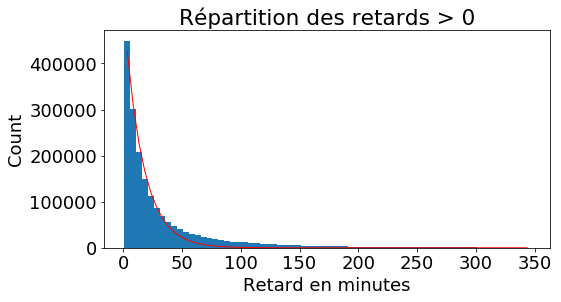

In [438]:

plt.rcParams["figure.figsize"] = (8,4)

def func(x, a, b, c):
    return a * np.exp(-(b * x) ) +c*0# no c needed

n, bins, patches = plt.hist(samples[samples['DELAY'] >-1].loc[:, 'DELAY'], bins=range(1,350, 5))
bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])    
popt, pcov = curve_fit(func, bin_centers, n, p0 = [0, 0.5, 0.1])

plt.plot(bin_centers, func(bin_centers, *popt), 'r-', linewidth=1)
silent = plt.title('Répartition des retards > 0')
silent = plt.ylabel('Count')
silent = plt.xlabel('Retard en minutes')

## Analyzing Carrier delay and other delays

In [439]:
df['SUM_DELAYS'] = df['CARRIER_DELAY']+df['WEATHER_DELAY' ]+df['NAS_DELAY']+df['SECURITY_DELAY']+df['LATE_AIRCRAFT_DELAY']

In [440]:
df['NON_WEATHER_DELAYS'] = df['CARRIER_DELAY']+df['NAS_DELAY']+df['SECURITY_DELAY']+df['LATE_AIRCRAFT_DELAY']

In [441]:
df['OTHER_DELAY'] =  df['DELAY'] - df['SUM_DELAYS']
df[['SUM_DELAYS', 'DELAY', 'OTHER_DELAY']].describe()

,SUM_DELAYS,DELAY,OTHER_DELAY
count,5556195.000,5556195.000,5556195.000
mean,10.830,11.868,1.039
std,38.601,38.413,2.825
min,0.000,0.000,0.000
25%,0.000,0.000,0.000
50%,0.000,0.000,0.000
75%,0.000,6.000,0.000
max,2142.000,2142.000,14.000


In [442]:
flights_count= df.shape[0]
print(round((df[df['DELAY'] > 5].shape[0] / flights_count)*100) , '% of flights delayed' )
print(round((df[df['SUM_DELAYS'] > 0].shape[0] / flights_count)*100) , '% of flights have delays reason detailed' )
print(round((df[df['OTHER_DELAY'] > 0].shape[0] / flights_count)*100) , '% of flights dont have detailed reason correctly filled' )

26 % of flights delayed
17 % of flights have delays reason detailed
17 % of flights dont have detailed reason correctly filled


In [443]:
ten_min_delay_count = df[df['DELAY'] >=10].shape[0]

quantile_99 = df[df['DELAY'] >=10]['DELAY'].quantile(0.99)
outlier_delay_count =df[df['DELAY'] >quantile_99].shape[0]

print( 'Out of',ten_min_delay_count, 'flights delayed of more than 10 min' )
print( '99% are under',quantile_99,'min' )
print( 'Which leaves 1% of very large delays (outliers) : ',outlier_delay_count,'flights' )

Out of 1191753 flights delayed of more than 10 min
99% are under 310.0 min
Which leaves 1% of very large delays (outliers) :  11898 flights


### Creating new columns to help exploring

Categories columns

In [444]:
df['CARRIER_ID'] = df.CARRIER.astype('category').cat.codes

df['TAIL_ID'] = df.TAIL_NUM.astype('category').cat.codes

df['ORIGIN_ID'] = df.ORIGIN_AIRPORT_ID.astype('category').cat.codes
df['DEST_ID'] = df.DEST_AIRPORT_ID.astype('category').cat.codes


### New numeric columns

In [445]:
def myround(x, base=5):
    return int(base * round(float(x)/base))

In [446]:
df['DAY']  = df['DATE'].apply(lambda x : x.timetuple().tm_yday)
df['WEEK'] = df['DAY'].apply(lambda x:myround(x ,7))

In [447]:
df['DEP_TIME_10min'] = df['CRS_DEP_TIME'].apply(lambda x:myround(x ,10))
df['ARR_TIME_10min'] = df['CRS_ARR_TIME'].apply(lambda x:myround(x ,10))

In [448]:
df[['CARRIER', 'DELAY']].groupby('CARRIER').mean().sort_values('DELAY').index.values

array(['HA', 'AS', 'DL', 'WN', 'OO', 'UA', 'AA', 'EV', 'VX', 'B6', 'NK',
       'F9'], dtype=object)

In [449]:
 df[['CARRIER', 'DELAY']].groupby('CARRIER').count()

,DELAY
CARRIER,
AA,873209
AS,165641
B6,280251
DL,964797
EV,489510
F9,94505
HA,76334
NK,135371
OO,593938


In [455]:
if 'Destination' not in df.columns:
    col='DEST_ID'
    y_col = 'DELAY'
    col_new_name = 'Destination'
    col_ordered =df[[col,y_col]].groupby(col).mean().sort_values(y_col).reset_index().reset_index().set_index(col).rename({'index':col_new_name}, axis=1)
    df = df.join(col_ordered.drop(y_col , axis =1), on=col)

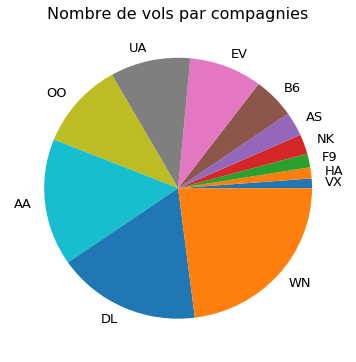

In [450]:
df_carrier_delay =  df[['CARRIER', 'DELAY']].groupby('CARRIER').count().sort_values('DELAY')
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams["font.size"] = (13)
silent =  plt.pie(df_carrier_delay.values, None, df_carrier_delay.index.values)
silent = plt.title("Nombre de vols par compagnies", fontsize=16)


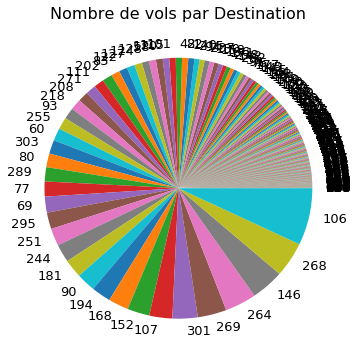

In [456]:
df_carrier_delay =  df[['Destination', 'DELAY']].groupby('Destination').count().sort_values('DELAY')
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams["font.size"] = (13)
silent =  plt.pie(df_carrier_delay.values, None, df_carrier_delay.index.values)
silent = plt.title("Nombre de vols par Destination", fontsize=16)


### Exploring several features compared to mean delay

In [457]:
def delay_stats(df, x_column, y_column, x_column_label = 'default', y_column_label = 'default', show_distrib=False, ci =95, pltshow=True):
    if x_column_label == 'default':
        x_column_label= x_column
    if y_column_label == 'default':
        y_column_label= y_column
        
    x_ordered = df[[x_column, y_column]].groupby(x_column).mean().sort_values(y_column)
    uniques = df[x_column].unique()
    uniques.sort()
    if len(uniques)<10:
        plt.rcParams["figure.figsize"] #= (8,4)
    else:
        plt.rcParams["figure.figsize"] #= (16,6)

    if show_distrib ==True:
        fig = plt.hist(df[x_column], bins =len(uniques))
        silent = plt.title('Flights repartition per '+x_column_label)
        silent = plt.ylabel('Count')
        silent = plt.xlabel(x_column_label)
        plt.show()

    if len(uniques) <25 :
        fig = sns.boxplot(x_column , y_column, data=df)
        fig = sns.pointplot(uniques , df.groupby([x_column])[y_column].mean().values, join=True)
        silent = fig.axes.set_ylim(-1, 40)
        silent = fig.set_title(y_column_label+' par '+x_column_label)
        silent = fig.set(xlabel=x_column_label, ylabel=y_column_label)
    else:
        #fig = sns.pointplot(x_ordered.index.values, x_ordered[y_column].values, join=True, order = x_ordered.index.values)
        fig = sns.lineplot(x_column, y_column, data=df, style_order =x_ordered.index.values, ci=ci, legend='full')
        silent = fig.axes.set_ylim(-1, 70)
        silent = plt.title(y_column_label+' par '+x_column_label)
        silent = plt.ylabel(y_column_label)
        silent = plt.xlabel(x_column_label)
    if pltshow:
        plt.show()
    return fig


In [458]:
plt.rcParams["figure.figsize"] = (10,5)

C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


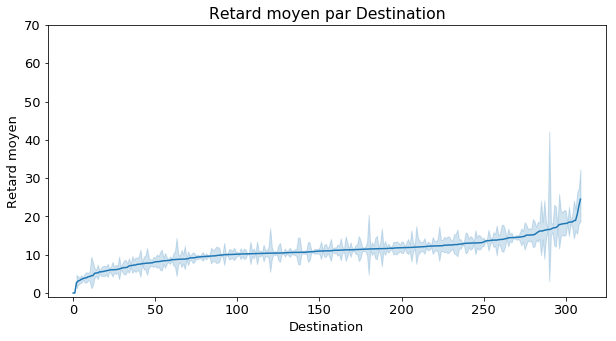

In [459]:
delay_stats(df, 'Destination', 'DELAY', 'Destination', 'Retard moyen')

In [460]:
if 'Departure' not in df.columns:
    col='ORIGIN_ID'
    y_col = 'DELAY'
    col_new_name = 'Departure'
    col_ordered =df[[col,y_col]].groupby(col).mean().sort_values(y_col).reset_index().reset_index().set_index(col).rename({'index':col_new_name}, axis=1)
    df = df.join(col_ordered.drop(y_col , axis =1), on=col)

In [301]:
plt.rcParams["figure.figsize"] = (10,5)

C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


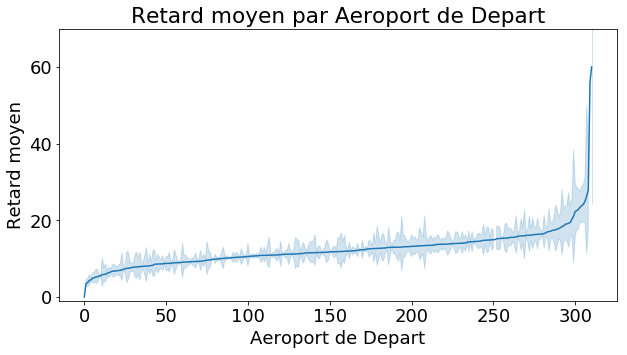

In [302]:
delay_stats(df, 'Departure', 'DELAY', 'Aeroport de Depart', 'Retard moyen')

In [387]:
plt.rcParams["figure.figsize"] = (14,5)

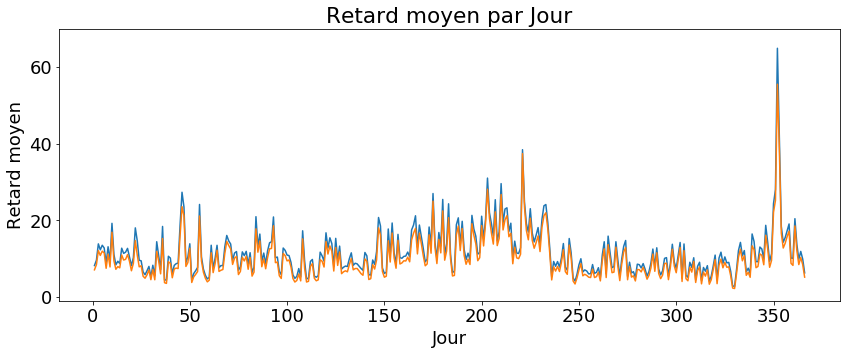

In [412]:
delay_stats(df, 'DAY', 'DELAY', 'Jour', 'Retard moyen', ci=None, pltshow=False)
fig = delay_stats(df, 'DAY', 'NON_WEATHER_DELAYS', 'Jour', 'Retard moyen', ci =None, pltshow=False)


In [ ]:
df[['NON_WEATHER_DELAYS', 'DATE']].groupby('DATE').mean().sort_values('NON_WEATHER_DELAYS').tail(5)

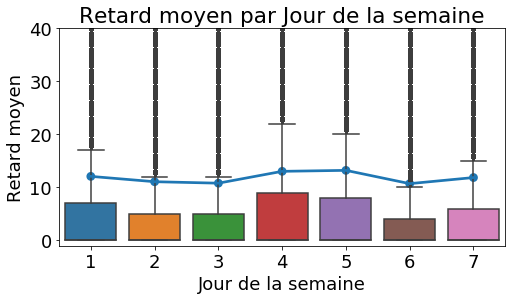

In [307]:
delay_stats(df, 'DAY_OF_WEEK', 'DELAY', 'Jour de la semaine', 'Retard moyen')

C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


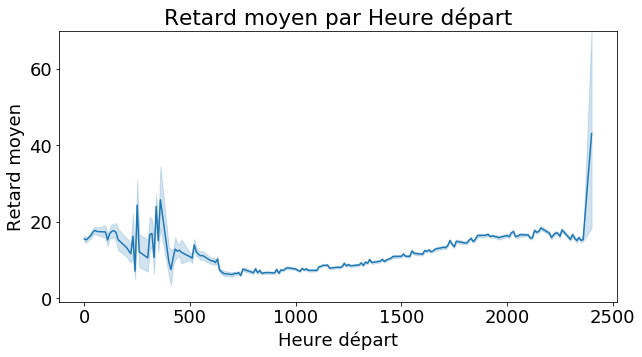

In [310]:
plt.rcParams["figure.figsize"] = (10,5)
delay_stats(df, 'ARR_TIME_10min','DELAY', 'Heure départ', 'Retard moyen')

In [ ]:

delay_stats(df, 'DEP_TIME_10min','DELAY', 'Heure arrivée', 'Retard moyen')

C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


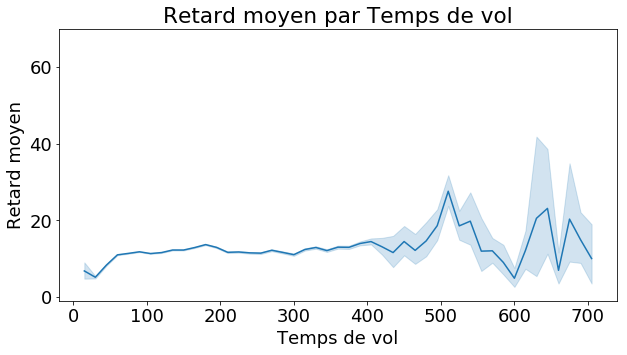

In [312]:

df['CRS_ELAPSED_TIME_15min'] = df['CRS_ELAPSED_TIME'].apply(lambda x:myround(x ,15))
delay_stats(df, 'CRS_ELAPSED_TIME_15min','DELAY', 'Temps de vol', 'Retard moyen')

In [313]:
if 'Code Avion' not in df.columns:
    col='TAIL_NUM'
    y_col = 'DELAY'
    col_new_name = 'Code Avion'
    col_ordered =df[[col,y_col]].groupby(col).mean().sort_values(y_col).reset_index().reset_index().set_index(col).rename({'index':col_new_name}, axis=1)
    df = df.join(col_ordered.drop(y_col , axis =1), on=col)

C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


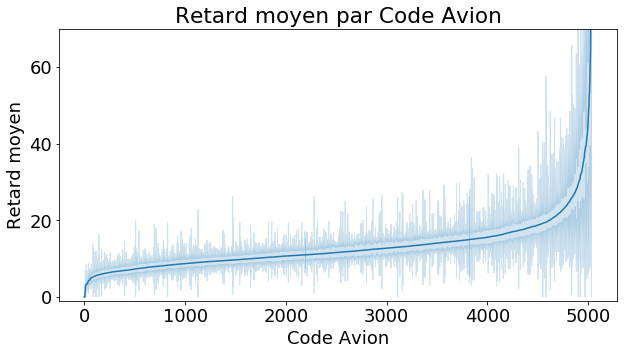

In [314]:
delay_stats(df, 'Code Avion', 'DELAY', 'Code Avion', 'Retard moyen')

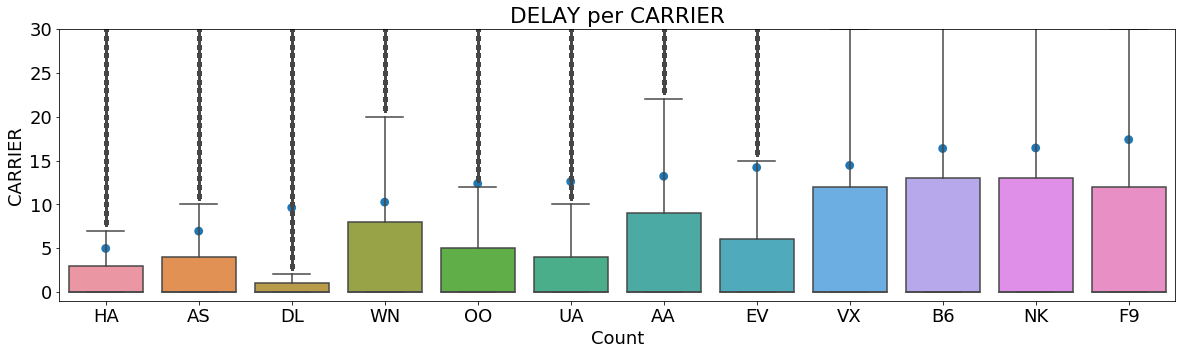

In [192]:
df.columns

Index(['DAY_OF_WEEK', 'DATE', 'CARRIER', 'TAIL_NUM', 'ORIGIN_AIRPORT_ID',
       'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'DEP_DELAY_NEW', 'CRS_ARR_TIME',
       'ARR_DELAY_NEW', 'CRS_ELAPSED_TIME', 'FLIGHTS', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'DELAY', 'SUM_DELAYS', 'OTHER_DELAY', 'CARRIER_ID', 'TAIL_ID',
       'ORIGIN_ID', 'DEST_ID', 'DAY', 'WEEK', 'DEP_TIME_10min',
       'ARR_TIME_10min'],
      dtype='object')

In [315]:
df_export= df[['DELAY','DAY','WEEK','CARRIER', 'TAIL_NUM', 'ORIGIN_AIRPORT_ID',  'DEST_AIRPORT_ID',
       'CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME'
      # , 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'SUM_DELAYS', 'OTHER_DELAY'
    ]].dropna()

### Drop duplicates

In [319]:
original_data = df_export.shape
df_export = df_export.drop_duplicates()
final_shape = df_export.shape
print(original_data[0]-final_shape[0],'duplicates dropped')

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [321]:
df_export.describe(include='all')

,DELAY,DAY,WEEK,CARRIER,TAIL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME
count,5440148.000,5440148.000,5440148.000,5440148,5440148,5440148.000,5440148.000,5440148.000,5440148.000,5440148.000
unique,nan,nan,nan,12,5035,nan,nan,nan,nan,nan
top,nan,nan,nan,WN,N491HA,nan,nan,nan,nan,nan
freq,nan,nan,nan,1277949,3936,nan,nan,nan,nan,nan
mean,11.891,185.859,185.928,NaN,NaN,12682.605,12682.774,1330.063,1490.382,145.394
std,38.465,104.442,104.464,NaN,NaN,1534.897,1534.970,489.259,515.795,76.412
min,0.000,1.000,0.000,NaN,NaN,10135.000,10135.000,1.000,1.000,18.000
25%,0.000,95.000,98.000,NaN,NaN,11292.000,11292.000,915.000,1105.000,88.000
50%,0.000,188.000,189.000,NaN,NaN,12889.000,12889.000,1325.000,1520.000,126.000
75%,6.000,275.000,273.000,NaN,NaN,14057.000,14057.000,1735.000,1920.000,178.000


## Export

In [322]:
df_export.to_csv('2016_clean.csv')